# ANN Regression

## Load Packages

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [17]:
print(tf.__version__)

2.3.1


## Load Data

Generate synthetic data for this example using uniform random numbers fo X and Y using $$ y = \cos(2x_1) + cos(3x_2) $$

In [4]:
N = 1000
X = np.random.random((N,2))*6 -3 #generate uniformally distributed data between -3 and 3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

In [8]:

X.shape

(1000, 2)

In [9]:
Y.shape

(1000,)

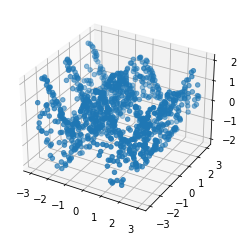

In [6]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y);

## Build Model

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,),activation='relu'),
    tf.keras.layers.Dense(1)
])

In [11]:
opt = tf.keras.optimizers.Adam(0.01) # pass in a learning rate 0.01 
model.compile(optimizer=opt, loss='mse')

## Training

In [13]:
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 695us/step - loss: 0.9424
Epoch 2/100
32/32 [==============================] - 0s 739us/step - loss: 0.9310
Epoch 3/100
32/32 [==============================] - 0s 652us/step - loss: 0.9231
Epoch 4/100
32/32 [==============================] - 0s 752us/step - loss: 0.9513
Epoch 5/100
32/32 [==============================] - 0s 709us/step - loss: 0.8591
Epoch 6/100
32/32 [==============================] - 0s 702us/step - loss: 0.8199
Epoch 7/100
32/32 [==============================] - 0s 634us/step - loss: 0.8305
Epoch 8/100
32/32 [==============================] - 0s 657us/step - loss: 0.7268
Epoch 9/100
32/32 [==============================] - 0s 696us/step - loss: 0.6623
Epoch 10/100
32/32 [==============================] - 0s 644us/step - loss: 0.6167
Epoch 11/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6572
Epoch 12/100
32/32 [==============================] - 0s 755us/step - loss: 0.6058
Epoch 13/100
32

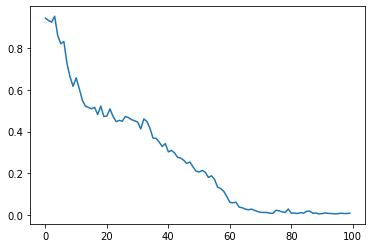

In [15]:
# Plot the loss
plt.plot(r.history['loss'], label='loss');

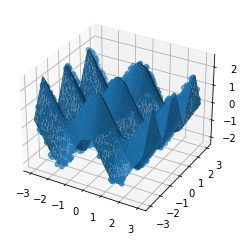

In [16]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()